<a href="https://colab.research.google.com/github/juniyasyos/fastapi-ggroupplagro/blob/main/training_papaya_models_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon May 27 15:58:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasetsfrom IPython.display import display, Image

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="drqoBEhK8PQ3X96EdepO")
project = rf.workspace("papayaprojects").project("hello_papaya")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
[Errno 2] No such file or directory: '/content/datasetsfrom IPython.display import display, Image'
/content
loading Roboflow workspace...
loading Roboflow project...


In [6]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.2.22 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/hello_papaya-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fals

In [7]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels_correlogram.jpg  train_batch0.jpg
BoxF1_curve.png					    labels.jpg		    train_batch1.jpg
BoxP_curve.png					    MaskF1_curve.png	    train_batch2.jpg
BoxPR_curve.png					    MaskP_curve.png	    val_batch0_labels.jpg
BoxR_curve.png					    MaskPR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			    MaskR_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				    results.csv		    val_batch1_pred.jpg
events.out.tfevents.1716825678.28bdafaf4d2e.5714.0  results.png		    weights


/content


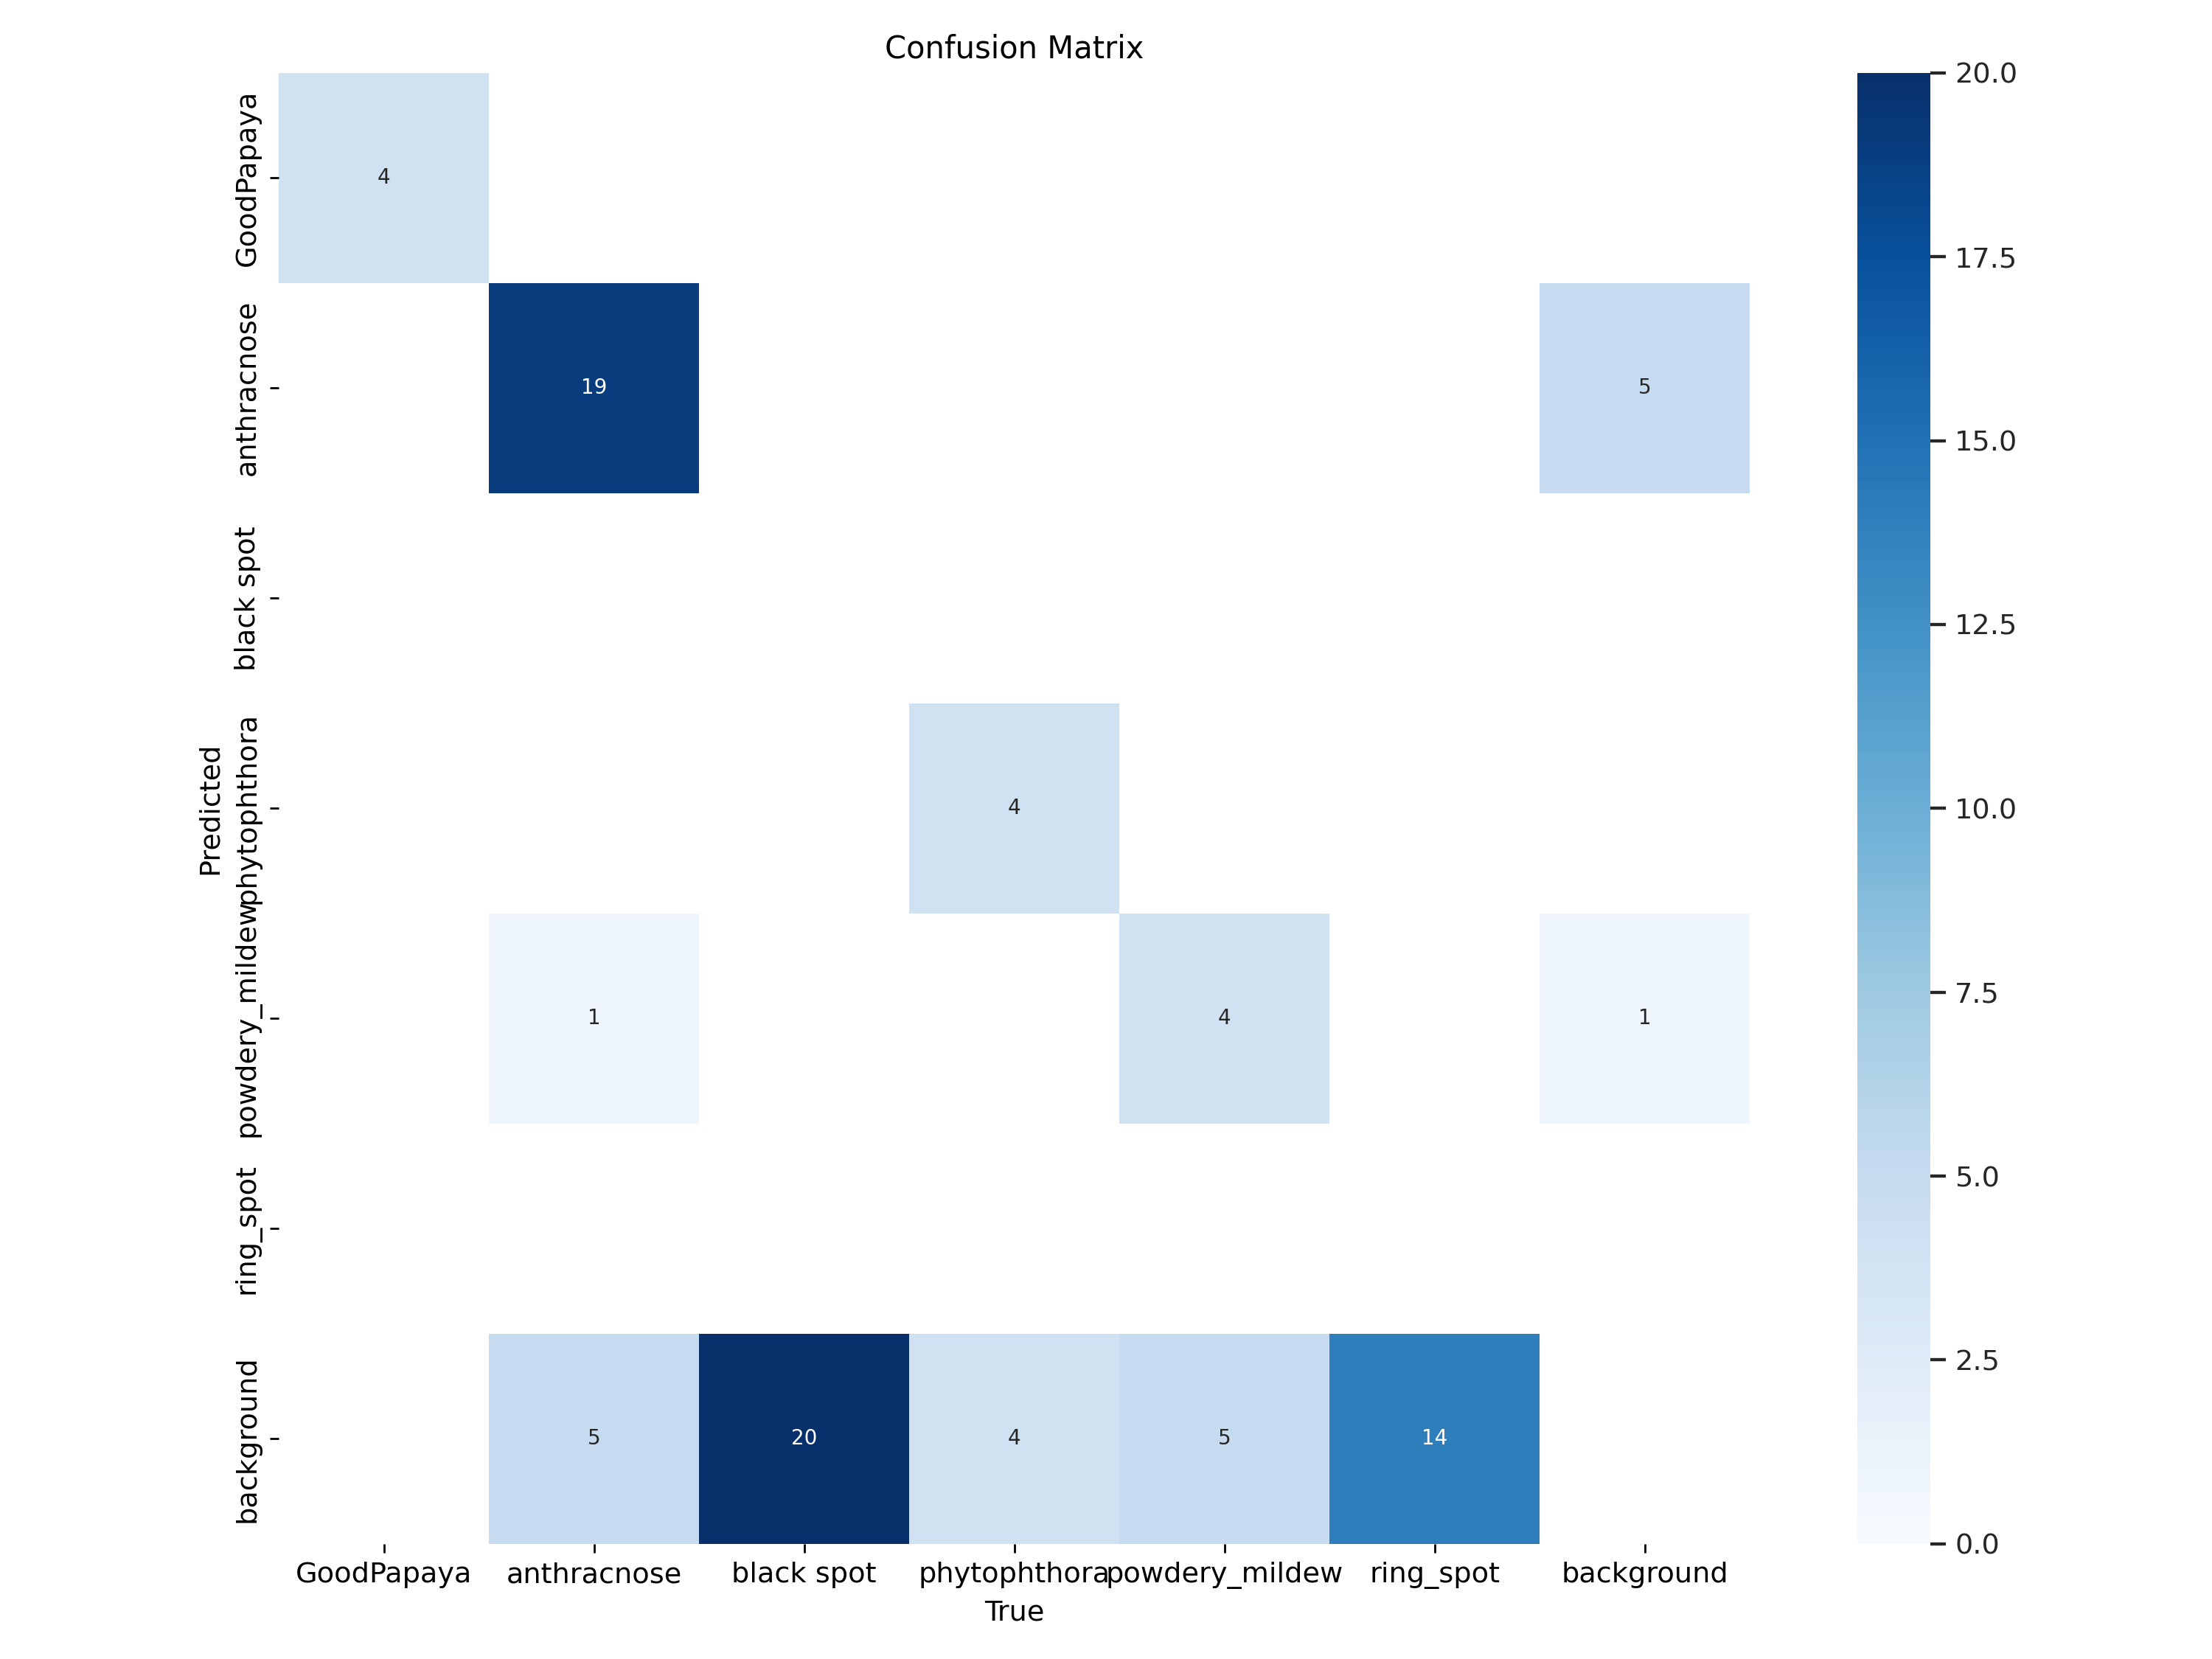

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

In [10]:
import pandas as pd

df = pd.read_csv(f'{HOME}/runs/segment/train/results.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0                     epoch  10 non-null     int64  
 1            train/box_loss  10 non-null     float64
 2            train/seg_loss  10 non-null     float64
 3            train/cls_loss  10 non-null     float64
 4            train/dfl_loss  10 non-null     float64
 5      metrics/precision(B)  10 non-null     float64
 6         metrics/recall(B)  10 non-null     float64
 7          metrics/mAP50(B)  10 non-null     float64
 8       metrics/mAP50-95(B)  10 non-null     float64
 9      metrics/precision(M)  10 non-null     float64
 10        metrics/recall(M)  10 non-null     float64
 11         metrics/mAP50(M)  10 non-null     float64
 12      metrics/mAP50-95(M)  10 non-null     float64
 13             val/box_loss  10 non-null     float64
 14             val/seg_loss  10 n

In [15]:
import shutil
from google.colab import files

# Path ke folder yang ingin dikompresi
folder_path = f'{HOME}/runs/segment/'

# Nama file ZIP yang akan dihasilkan
zip_file_name = 'segment.zip'

# Membuat arsip ZIP dari folder
shutil.make_archive('segment', 'zip', folder_path)

# Mendownload file ZIP
files.download(f'{zip_file_name}')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>